In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import diamond as Aztec # the (rather complicated) data structure

In [3]:
import tiling # this contains the algorithm(s) i.e. for tiling and the height function 

In [4]:
def Z(x,y) :
    return (2 / math.pi) * ( (x - 1/2) * math.atan( (math.sqrt(1/4 - (x-1/2)**2 - (y - 1/2)**2)) / (1/2 - y) )
                           + (1/2)* math.atan( (2*(x - 1/2)*(1/2 - y)) / (math.sqrt(1/4 - (x - 1/2)**2 - (y - 1/2)**2)) ) 
                           - (1/2 - y)* math.atan( (x - 1/2) / math.sqrt(1/4 - (x - 1/2)**2 - (y - 1/2)**2 ) ) )

In [5]:
def f_star(y, x) :
    if (y >= 0 and y < 1 / 2) :
        if(x >= 0 and x <= (1 - 2*math.sqrt(y*(1-y))) / 2) :
            return 0
        elif (x > ((1 - 2*math.sqrt(y*(1-y))) / 2 ) and x < ((1 + 2*math.sqrt(y*(1-y))) / 2 )) :
            return ((y/2) + (1/2)*(Z(x,y)))
        elif (x >= ((1 + 2*math.sqrt(y*(1-y))) / 2 )) :
            return y
    elif (y == 1/2) :
        return x / 2
    elif (y > 1/2 ) :
        return x - f_star(1 - y, x)
    
def G(x,y) :
    return ( x + y - 2*f_star(y,x) )

In [6]:
sizes = [10,20,40,80,100]
sweeps = 100

In [7]:
convergence_data = dict()
for size in sizes :
    convergence_values = []
    grid = Aztec.Diamond(size)
    tiling.weight_computation(grid) # compute Uniform Weights for each tiling
    for _ in range(sweeps) :
        M = tiling.generate_matching(grid);  # generate a uniform tiling T
        h = grid.height_function(M)          # compute the associated height function to T i.e. \eta_{T}
        
        def R(u, v) : 
            assert (abs(u) + abs(v) <= 1)
            return 2*G( (u - v + 1) / 2, (u + v + 1) / 2 )
        term = max([ ( (1/size)*h[(i,j)] - R( i / (size + 1), j / (size + 1) ) ) for (i,j) in list(h.keys())])
        convergence_values.append(term)
    convergence_data[size] = convergence_values

KeyboardInterrupt: 

In [ ]:
convergence_data

In [ ]:
def batch_estimate(data,observable,k):
    '''Divide data into k batches and apply the function observable to each.
    Returns the mean and standard error.'''
    batches = np.reshape(data,(k,-1))
    values = np.apply_along_axis(observable, 1, batches)
    return np.mean(values), np.std(values)/np.sqrt(k-1)

In [ ]:
mean_profiles = []
for size in sizes :
    mean_profiles.append(batch_estimate(convergence_data[size],np.mean,20))

In [ ]:
Y, err = list(zip(*mean_profiles))
err = 10 * np.array(err) # Error is too small
plt.plot(sizes, Y)
plt.errorbar(sizes, y, yerr = err, fmt ='o')
#plt.legend(sizes,title="N")
plt.xlabel("N")
plt.ylabel(r"$\delta$")

In [ ]:
x = np.linspace(-1, 1, 10001)
y = np.linspace(-1, 1, 10001)
# full coordinate arrays
xx, yy = np.meshgrid(x, y)

@np.vectorize
def R(u, v) : 
    if abs(u) + abs(v) <= 1 :
        return 2*G( (u - v + 1) / 2, (u + v + 1) / 2 )
    else :
        return 0
    
zz = R(xx/n,yy/n)

In [35]:
zz

array([[1.        , 1.00002561, 1.00005117, ..., 1.00005117, 1.00002561,
        1.        ],
       [0.99997439, 1.        , 1.00002556, ..., 1.00002556, 1.        ,
        0.99997439],
       [0.99994883, 0.99997444, 1.        , ..., 1.        , 0.99997444,
        0.99994883],
       ...,
       [0.99994883, 0.99997444, 1.        , ..., 1.        , 0.99997444,
        0.99994883],
       [0.99997439, 1.        , 1.00002556, ..., 1.00002556, 1.        ,
        0.99997439],
       [1.        , 1.00002561, 1.00005117, ..., 1.00005117, 1.00002561,
        1.        ]])

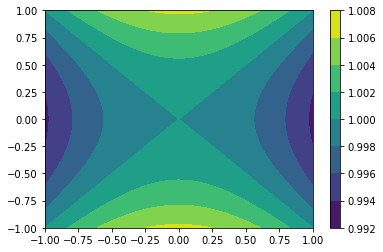

In [36]:
h = plt.contourf(x, y, zz)
plt.colorbar()
plt.show()